In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

# Text Processing 
import re 
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# NLP Utilities 
# Download the WordNet resource
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Model Persistence 
import joblib

# Machine Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import DataLoader, TensorDataset

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Find Main Working Directory
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
df = pd.read_csv('../data/preprocessed/preprocessed_data.csv')

In [4]:
df.sample(3)

,Branch,Sentiment,Tweet
21208,CS-GO,Positive,"['seeing', 'shroud', 'come', 'back', 'us', 're..."
20743,CS-GO,Positive,"['csgo', 'always', 'looked', 'really', 'fun', ..."
57270,Facebook,Negative,"['blatant', 'bias', 'social', 'media', 'giants..."


#### Handling missing values 

In [5]:
df.isnull().sum()

Branch       0
Sentiment    0
Tweet        0
dtype: int64

In [6]:
# Drop missing values
df = df.dropna()

In [7]:
# Check missing values 
print(df.isnull().sum())

Branch       0
Sentiment    0
Tweet        0
dtype: int64


In [8]:
# Check duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 8528


In [9]:
df = df.drop_duplicates()
print(f"Remaining rows after dropping duplicates: {df.shape[0]}")

Remaining rows after dropping duplicates: 62429


In [10]:
duplicate_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after cleanup: {duplicate_count_after}")

Number of duplicate rows after cleanup: 0


### 1.1 Train Split Data 

In [41]:
# Split data into training and testing sets
X = df['Tweet'] # Features 
y = df['Sentiment'] # Target

In [42]:
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shaped of the training and testing data
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)

Training data shape:  (49943,)
Testing data shape:  (12486,)
Training labels shape:  (49943,)
Testing labels shape:  (12486,)


### Vectorize data

In [44]:
# Applying BoW
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)

print("BoW Training data shape: ", X_train_bow.shape)
print("BoW Testing data shape: ", X_test_bow.shape)

BoW Training data shape:  (49943, 34399)
BoW Testing data shape:  (12486, 34399)


In [45]:
# Convert test data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("BoW Training data shape: ", X_train_tfidf.shape)
print("BoW Testing data shape: ", X_test_tfidf.shape)

BoW Training data shape:  (49943, 34399)
BoW Testing data shape:  (12486, 34399)


In [46]:
# Print the shapes of the TF-IDF features
print("Training TF-IDF shape: ", X_train_tfidf.shape)
print("Testing TF-IDF shape: ", X_test_tfidf.shape)

Training TF-IDF shape:  (49943, 34399)
Testing TF-IDF shape:  (12486, 34399)


In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bow, y_train)

# Evaluate the model's performance
y_pred = model.predict(X_test_bow)

In [48]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model's performance
y_pred_tfidf = model.predict(X_test_tfidf)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8913983661701105


In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_tfidf)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9010091302258529


In [51]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

  Irrelevant       0.82      0.95      0.88      1906
    Negative       0.94      0.87      0.90      4070
     Neutral       0.86      0.92      0.89      2943
    Positive       0.92      0.86      0.89      3567

    accuracy                           0.89     12486
   macro avg       0.88      0.90      0.89     12486
weighted avg       0.90      0.89      0.89     12486



In [52]:
print(metrics.classification_report(y_pred_tfidf, y_test))

              precision    recall  f1-score   support

  Irrelevant       0.84      0.95      0.89      1962
    Negative       0.94      0.89      0.91      4002
     Neutral       0.88      0.91      0.90      3030
    Positive       0.91      0.88      0.90      3492

    accuracy                           0.90     12486
   macro avg       0.89      0.91      0.90     12486
weighted avg       0.90      0.90      0.90     12486



In [53]:
# Evaluate the model's performance using a more comprehensive metric
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)

Accuracy: 0.8913983661701105
F1 Macro: 0.8895484138658158
F1 Weighted: 0.89109289912725


In [54]:
# Evaluate the model's performance using a more comprehensive metric
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred_tfidf, average='macro')
f1_weighted = f1_score(y_test, y_pred_tfidf, average='weighted')

print("Accuracy:", accuracy)
print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)

Accuracy: 0.8913983661701105
F1 Macro: 0.8996600916429158
F1 Weighted: 0.9008138498314465


Text(113.9222222222222, 0.5, 'predicted label')

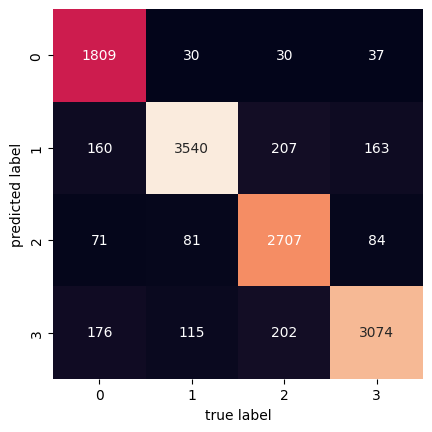

In [55]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

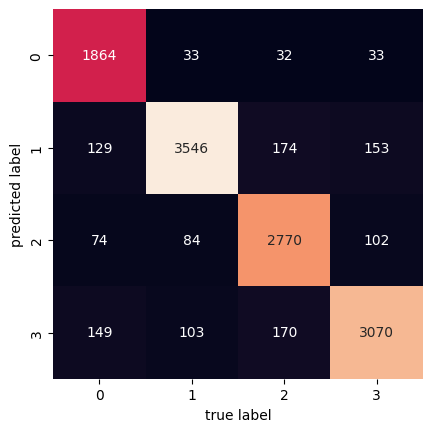

In [56]:
mat = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### Actual vs Predicted

In [57]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred_tfidf[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: ['technology', 'hard', 'find', 'shit', 'online', 'amazon', 'want', 'buy', 'shit', 'refuse', 'buy', 'amazon', 'made', 'coffee', 'mishap', 'cause', 'need', 'new', 'kettle', 'could', 'go', 'irl', 'store', 'fronts', 'urggg', 'problem', 'really', 'think', 'avoiding', 'amazon', 'hard']
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: ['eadice', 'happy', 'back', 'life']
Actual Label: Neutral
Predicted Label: Positive
-----------------------
Tweet: ['cyberpunkgame', 'im', 'gon', 'na', 'heated', 'hacker', 'death', 'grips', 'isnt', 'soundtrack', 'slaps', 'perfect']
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: ['get', 'phone', 'rhandlerr', 'cant', 'get', 'phone', 'rhandlerr', 'kidding', 'pictwittercomakemuwzq']
Actual Label: Positive
Predicted Label: Negative
-----------------------
Tweet: ['pubg', 'bigo', 'youtube', 'decide', 'list', 'richest', 'countries', 'largest', 'ecommerce', '

##### Save the Model

In [58]:
# Save the trained model
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

Predict Random Tweet By Model

In [83]:
# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_model.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

# Example tweets
example_tweets = [
    "Just got promoted at work! Feeling on top of the world.",
    "Had the best coffee today, can't stop thinking about it!",
    "Feeling so drained and overwhelmed right now.",
    "The traffic today was horrendous, totally ruined my mood.",
    "Planning my weekend, not sure what to do yet.",
    "Did you know that a group of flamingos is called a 'flamboyance'? Pretty cool!",
    "Spent a lovely afternoon in the park. Nature has such a calming effect love."
]

# Transform example tweets into TF-IDF features
example_tweets_tfidf = vectorizer.transform(example_tweets)

# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(example_tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(example_tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis.get(sentiment, '🤷')  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: Just got promoted at work! Feeling on top of the world.
Sentiment: Neutral
Emoji: 😐

Tweet: Had the best coffee today, can't stop thinking about it!
Sentiment: Positive
Emoji: 😄

Tweet: Feeling so drained and overwhelmed right now.
Sentiment: Irrelevant
Emoji: 🤷‍♂️

Tweet: The traffic today was horrendous, totally ruined my mood.
Sentiment: Neutral
Emoji: 😐

Tweet: Planning my weekend, not sure what to do yet.
Sentiment: Positive
Emoji: 😄

Tweet: Did you know that a group of flamingos is called a 'flamboyance'? Pretty cool!
Sentiment: Positive
Emoji: 😄

Tweet: Spent a lovely afternoon in the park. Nature has such a calming effect love.
Sentiment: Positive
Emoji: 😄

